# Principal Component Analysis (PCA) – Theory

## What is PCA?

**Principal Component Analysis (PCA)** is a **linear transformation** technique used to reduce the **dimensionality** of a dataset while preserving as much **variance (information)** as possible.

---

## Why Use PCA?

- High-dimensional data can be:
  - Hard to visualize
  - Redundant (features may be correlated)
  - Noisy
- PCA simplifies the data while retaining the **most important information** (i.e., directions with highest variance)

---

## How Does PCA Work?

1. **Standardize the data**
   - Ensure features have zero mean and unit variance
   - Especially important when features are on different scales

2. **Compute the covariance matrix**
   - Measures how features vary with respect to each other

3. **Find eigenvectors and eigenvalues**
   - Eigenvectors: directions (axes) of maximum variance (called **principal components**)
   - Eigenvalues: amount of variance along those directions

4. **Sort eigenvectors by eigenvalues**
   - Pick the top `k` eigenvectors that explain the most variance

5. **Project original data onto the new `k`-dimensional space**
   - Reduced data with most important patterns retained

---

## Use Cases

- **Data Visualization** (e.g., projecting high-dimensional data to 2D/3D)
- **Noise Reduction**
- **Preprocessing for supervised learning**
- **Image or signal compression**

---

## Key Concepts

| Term                 | Description |
|----------------------|-------------|
| Principal Component  | A new axis (direction) capturing the most variance |
| Explained Variance   | Amount of information retained in each component |
| Scree Plot           | Line graph showing explained variance by each component |
| Dimensionality       | Number of features (before and after reduction) |

---

## Pros and Cons

**Pros:**
- Removes redundancy and noise
- Speeds up training time
- Helps with visualization and pattern discovery

**Cons:**
- Transformed features are hard to interpret
- Only captures **linear** relationships
- Potential loss of information if too much dimensionality is reduced


Explained Variance Ratio: [0.36198848 0.1920749 ]


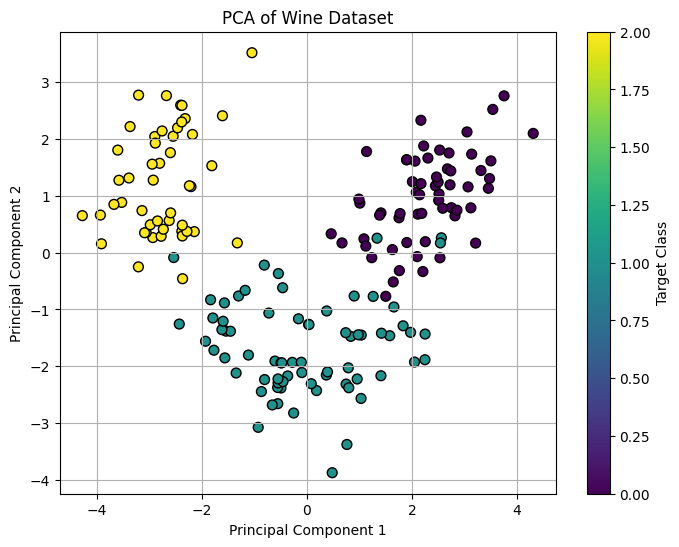

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.grid(True)
plt.colorbar(scatter, label='Target Class')
plt.show()


step-by-step explanation of the code you shared using `PCA` on the **Wine dataset**:

---

### 1. **Importing Libraries**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
```

* `numpy` for numerical operations.
* `matplotlib.pyplot` for visualization.
* `load_wine` to load the Wine dataset from `sklearn`.
* `StandardScaler` to normalize features (very important before PCA).
* `PCA` to perform Principal Component Analysis.

---

###  2. **Loading the Dataset**

```python
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names
```

* `X` contains the 13 numeric features (e.g., alcohol content, magnesium, etc.).
* `y` contains the wine class labels: 0, 1, 2.
* `target_names` gives the string labels for each wine class.

---

###  3. **Standardizing the Data**

```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

* PCA is sensitive to the scale of data.
* `StandardScaler` standardizes features by removing the mean and scaling to unit variance.
* `X_scaled` is the normalized version of the original data.

---

###  4. **Applying PCA**

```python
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
```

* `n_components=2`: Reduce the 13-dimensional data to **2 principal components**.
* `fit_transform()` learns the components and transforms the data.
* `X_pca` is the transformed data with shape `(178, 2)` — perfect for 2D plotting.

---

###  5. **Explained Variance Ratio**

```python
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
```

* Shows how much of the total variance is captured by each principal component.
* Example output: `[0.36198848 0.1920749]` → together they capture \~55.4% of the original information.

---

###  6. **Visualizing PCA Results**

```python
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
```

* Creates a scatter plot using the two principal components.
* `c=y` colors points by their class (0, 1, 2).
* `edgecolor='k'` gives a black edge around points.
* `s=50` sets the point size.

```python
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.grid(True)
plt.colorbar(scatter, label='Target Class')
plt.show()
```



---

###  What You Achieved:

* Compressed high-dimensional wine data (13D) into 2D.
* Preserved most of the variance.
* Visualized the separation between different wine classes in 2D space.


